In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\amitk\OneDrive\Desktop\jupyter notebook\train (1).csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [11]:
mis=df.isnull().mean()
df = df.drop(columns=mis[mis > 0.5].index)

In [13]:
numerical_data = df.select_dtypes(include=['number']).columns

In [17]:
hi=df[numerical_data].median()

In [18]:
df[numerical_data] = df[numerical_data].fillna(hi)

In [20]:
categorical_data = df.select_dtypes(include=['object']).columns

In [21]:
df[categorical_data].mode()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [27]:
hi1=df[categorical_data].mode().iloc[0]

In [28]:
df[categorical_data] = df[categorical_data].fillna(hi1)

In [29]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [30]:
df.isnull().sum().sum()

0

In [32]:
print(df.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
std       1.112799    30.202904     20.645407   180.731373   456.098091  ..

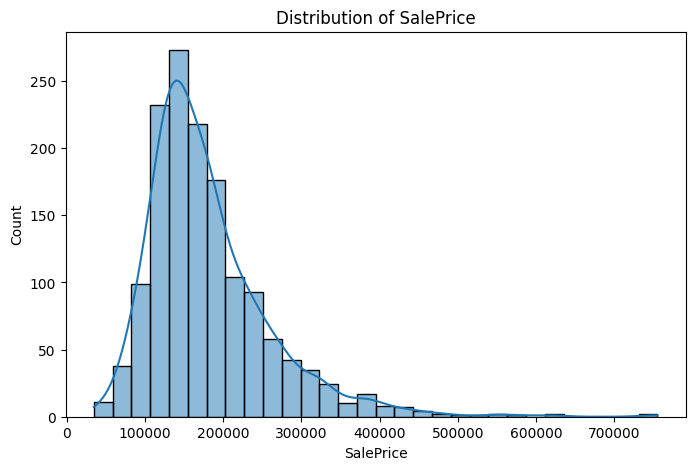

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

In [35]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['number'])))
df = df[(z_scores < 3).all(axis=1)] 

In [36]:
neymarical_data=(df.select_dtypes(include=['number']))

In [37]:
from scipy import stats
z_scores = np.abs(stats.zscore(neymarical_data))

In [49]:
df = df[(z_scores < 3).all(axis=1)]
df

C:\Users\amitk\AppData\Local\Temp\ipykernel_2200\883306925.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(z_scores < 3).all(axis=1)]


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice


In [43]:
df = pd.get_dummies(df, drop_first=True)

In [44]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [48]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.